# George Washington [Something, something, Title here]

Kat Canavan and Phillip Post


First, import libraries/ packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim as geo
# plotly
import plotly.express as px
import plotly.graph_objects as go

##### (Optional) uncomment the following cell to run data collection

In [ ]:
# import find_a_grave_scraper as scraper
# scraped_data = scraper.get_info()
# scraped_data.to_csv('Scraper_Data.csv', index = False)

### Section title here

For the purpose of this notebook (so that we don't tax findagrave.com's servers) we're going to use a csv file we already prepared with the code above. Now we need to unpack that file back into a data frame.
Note: If you want to run the rest of the worksheet with your own data from the previous cell, change the name of the file here to "Scraper_Data.csv".

In [2]:
dataframe = pd.read_csv('George_Washingtons.csv')

## Plots!

### Trends in Births of George Washingtons Over Time

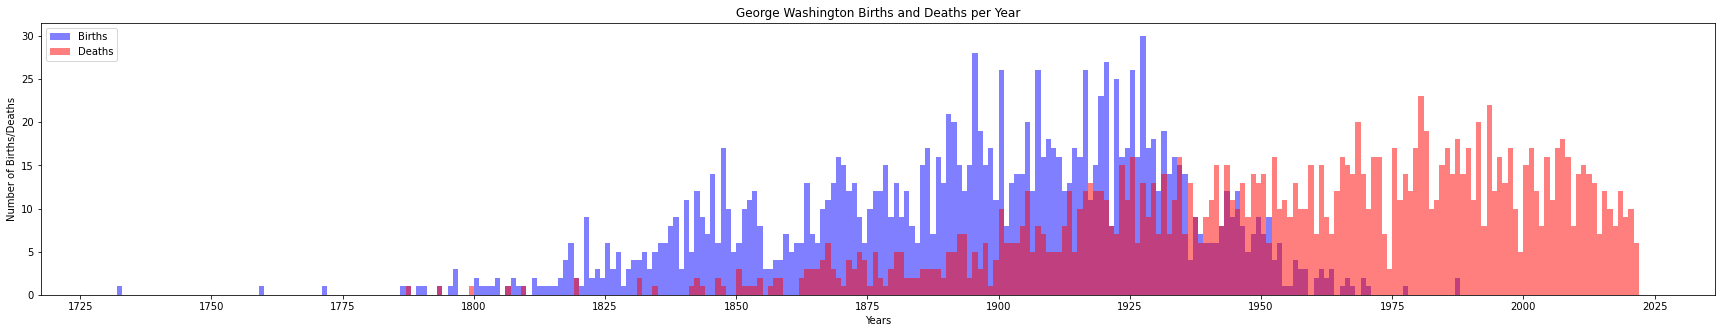

In [224]:
# each year should be represented on the chart so subtract the min year from max
# year to get the range
birth_year_range = (dataframe['Birth Year'].max()) - (dataframe['Birth Year'].min())
# the same as above, except for death year
death_year_range = (dataframe['Death Year'].max()) - (dataframe['Death Year'].min())

# create the figure before plotting the data to establish properties
plt.figure(figsize=(30,5),
           facecolor='white')

# histogram to represent the number of births per year
plt.hist(dataframe['Birth Year'], 
         alpha=0.5, 
         label='Births',
         bins=birth_year_range,
         color='blue')

# histogram to represent the number of deaths per year
plt.hist(dataframe['Death Year'], 
         alpha=0.5,
         label='Deaths',
         bins=death_year_range,
         color='red')
  
# add key
plt.legend(loc='upper left')
# add lables every 25 years
x_ticks = np.arange(1725, 2050, 25)
plt.xticks(x_ticks); 

# add chart and axis titles
plt.title("George Washington Births and Deaths per Year")
plt.xlabel('Years')
plt.ylabel('Number of Births/Deaths'); # semicolon suppresses garbage output

### Trends in Lifespan for George Washingtons

In [220]:
# create empty list to store lifespans
lifespans = []
# calculate lifespan for each George
for index, George in dataframe.iterrows():
    # subtract birth year from death year
    lifespan = George["Death Year"] - George["Birth Year"]
    lifespans.append(lifespan)

# create a new column in the dataframe to store lifespan values
dataframe['Lifespan'] = lifespans

In [222]:
# make a scatter plot of lifespan of every birth year
figure = px.scatter(y=dataframe['Lifespan'],
                    x=dataframe['Birth Year'],
                    title="Lifespan of People Named George Washington by Year of Birth",
                    labels={'x':'Birth Year', 'y':'Years Lived', 'color':'Year of Death'}, 
                    color=dataframe['Death Year'],
                    trendline="lowess", trendline_options=dict(frac=0.05))
# change the color 
figure.update_layout(coloraxis = {'colorscale':'viridis'})
figure.show()

### Trends in location of George Washington Graves